In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Surface Triangulations


For some applications, the evenly sampled grids required by the preceding routines
are overly restrictive and inconvenient. In these situations, the triangulation-based
plots can be very useful

In [2]:
np.ravel?

In [4]:
def f(x, y):
   return np.sin(np.sqrt(x ** 2 + y ** 2))

In [5]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

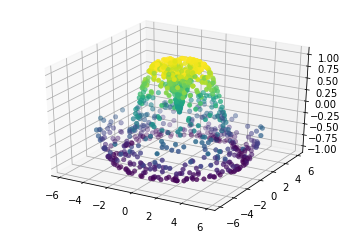

In [16]:
ax=plt.axes(projection='3d')
ax.scatter(x,y,z,c=z,cmap='viridis',linewidth=0.5);

In [10]:
ax.scatter?

This leaves a lot to be desired. The function that will help us in this case is
ax.plot_trisurf, which creates a surface by first finding a set of triangles formed
between adjacent points

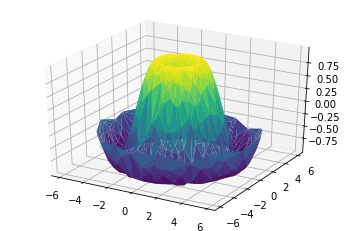

In [21]:
ax=plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap='viridis',edgecolor='none')   # edgecolor=None is also showing same

The result is certainly not as clean as when it is plotted with a grid, but the flexibility
of such a triangulation allows for some really interesting three-dimensional plots. For
example, it is actually possible to plot a three-dimensional Möbius strip using this.

### Example: Visualizing a Möbius strip


A Möbius strip is similar to a strip of paper glued into a loop with a half-twist. Topo‐
logically, it’s quite interesting because despite appearances it has only a single side!

The key to creating the Möbius strip is to think about its parameterization: it’s a two
dimensional strip, so we need two intrinsic dimensions. Let’s call them θ, which
ranges from 0 to 2π around the loop, and w which ranges from –1 to 1 across the
width of the strip

In [22]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)


Now from this parameterization, we must determine the (x, y, z) positions of the
embedded strip

Thinking about it, we might realize that there are two rotations happening: one is the
position of the loop about its center (what we’ve called θ), while the other is the twist‐
ing of the strip about its axis (we’ll call this ϕ). For a Möbius strip, we must have the
strip make half a twist during a full loop, or Δϕ = Δθ/2.

In [23]:
 phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embed‐
ding. We’ll define r, the distance of each point from the center, and use this to find the
embedded x, y, z coordinates

In [24]:
# radius in x-y plane
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best
way to do this is to define the triangulation within the underlying parameterization,
and then let Matplotlib project this triangulation into the three-dimensional space of
the Möbius strip

(-1, 1)

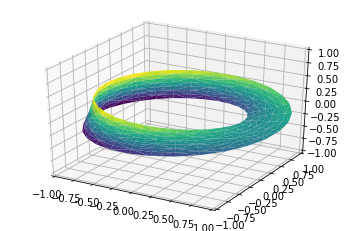

In [25]:
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)

### Geographic Data with Basemap